### dependencies

In [107]:

# Imports
import numpy as np
import pandas as pd
from numpy import concatenate
from pandas import read_csv, Series
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [92]:
# # Define global variables
# #TODO find out what is the target variable and what lag steps
# num_features = 53
target_variable = 'Adj Close'
lag_steps = 1


In [93]:

df = read_csv('../../data/clean/djia_stock_data.csv',index_col=0)
df.dropna(inplace=True)
print(df.shape)
df = df.iloc[:,:31]
# isolating all the adjclose


(2516, 180)


In [94]:
newDfForApple = df[['Adj Close']].copy()
newDfForApple.index.name = 'Date'
newDfForApple.drop(index= newDfForApple.index[0], inplace=True)
newDfForApple.index = pd.to_datetime(newDfForApple.index)
type(newDfForApple.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [95]:
def create_features(df):
    """Creates time series features from the 'Adj Close' column."""

    df['lag_1'] = df['Adj Close'].shift(1)       # Value from yesterday
    df['lag_7'] = df['Adj Close'].shift(7)       # Value from last week
    df['lag_30'] = df['Adj Close'].shift(30)      # Value from last month

    df['rolling_mean_7'] = df['Adj Close'].rolling(window=7).mean().shift(1)  # 7-day rolling mean
    df['rolling_mean_30'] = df['Adj Close'].rolling(window=30).mean().shift(1) # 30-day rolling mean

    df['day_of_week'] = df.index.dayofweek  # Day of the week
    df['month'] = df.index.month          # Month of the year
    df['quarter'] = df.index.quarter        # Quarter of the year
    df['year'] = df.index.year            # Year
    return df

In [ ]:
transformed_df = create_features(newDfForApple)
transformed_df.dropna(inplace=True)
transformed_df.to_csv('../../data/clean/transformed_df_for_RF.csv')

In [ ]:
# split = int(newDfForApple.shape[0]*0.8)
# train = newDfForApple[:split]
# test = newDfForApple[split:]

In [98]:
# X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
# X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [105]:
X = newDfForApple.drop('Adj Close', axis=1)  # Features
y = newDfForApple['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

### Random Forest

Random Forest Test MAE: 20.739
Mean Squared Error: 939.5020963158979
R-squared: -0.2334085199175877


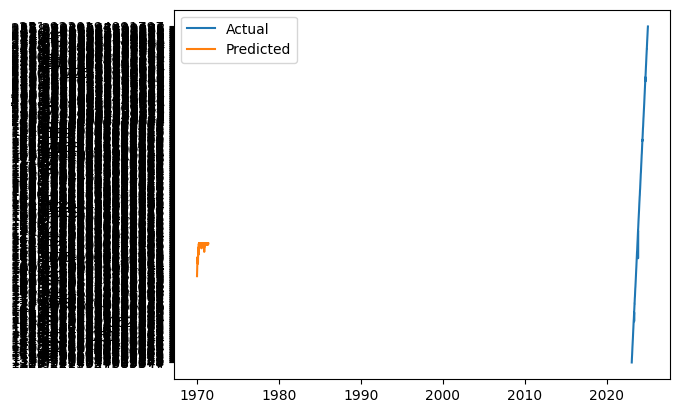

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Random Forest Test MAE: %.3f' % mae)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# not sure how a random forest is suppose to work
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
# plt.xticks(np.arange(0, 60, 12))  # Set ticks every 12 months
plt.legend()
plt.show()